# Plot 3D power and forecasted errorbars

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import forecast as fc
import decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
forecast = fc.FisherForecast()

In [3]:
# define binning for plots
kmin_hMpc=0.01
kmax_hMpc=1.0
ks_hMpc=np.linspace(kmin_hMpc,kmax_hMpc,100)
Nk=len(ks_hMpc)
dk_hMpc=ks_hMpc[1]-ks_hMpc[0]
print('Nk =',Nk)
print('dk =',dk_hMpc)

Nk = 100
dk = 0.01


In [4]:
def z_str(z):
    return "{:.3g}".format(decimal.Decimal(z))

In [5]:
def mu_str(mu):
    return "{:.3g}".format(decimal.Decimal(mu))

In [6]:
forecast.verbose=1
forecast.lmin=3701.0
forecast.lmax=3901.0
P1=forecast.TotalFluxP3D_degkms(10.0,0.001)
print('P_T',P1)
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
P2=forecast.TotalFluxP3D_degkms(10.0,0.001,Pw2D=Pw2D,PN_eff=PN_eff)
print('P_T',P2)

lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003043036438296833 0.00023471071658250897 3.791309009418653e-05
np_eff, Pw2D, PN_eff = 0.3602411738327714 0.042821552946834825 0.34585071753117236
P_T 1.355676746247553
lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003043036438296833 0.00023471071658250897 3.791309009418653e-05
np_eff, Pw2D, PN_eff = 0.3602411738327714 0.042821552946834825 0.34585071753117236
P_T 1.355676746247553


### Plot fixed mu (0.8<mu<1.0), for different z

3501.0 <l< 3701.0
lc, lrc, zq = 3599.6112290079327 1087.1982339941508 2.3109060670414032
I1, I2, I3 = 9.716063291983756e-05 4.3678658766870716e-05 1.696380644011775e-05
np_eff, Pw2D, PN_eff = 0.11502083909638379 0.07816861605832018 1.5179464181613025
3701.0 <l< 3901.0
lc, lrc, zq = 3799.68432899366 1087.1982339941508 2.4949323961228056
I1, I2, I3 = 0.0003043036438296833 0.00023471071658250897 3.791309009418653e-05
np_eff, Pw2D, PN_eff = 0.3602411738327714 0.042821552946834825 0.34585071753117236
3901.0 <l< 4101.0
lc, lrc, zq = 3999.750117194823 1087.1982339941508 2.6789519998579596
I1, I2, I3 = 0.00026100778472976907 0.0001978425862273042 4.0215176426120946e-05
np_eff, Pw2D, PN_eff = 0.3089866081366047 0.04906328904984116 0.49865119103280936
4101.0 <l< 4301.0
lc, lrc, zq = 4199.809638543156 1087.1982339941508 2.862965839370331
I1, I2, I3 = 0.00025486203789250707 0.00020864404184151486 3.570576223511967e-05
np_eff, Pw2D, PN_eff = 0.3017111413466854 0.05426745861784935 0.4643461077084013

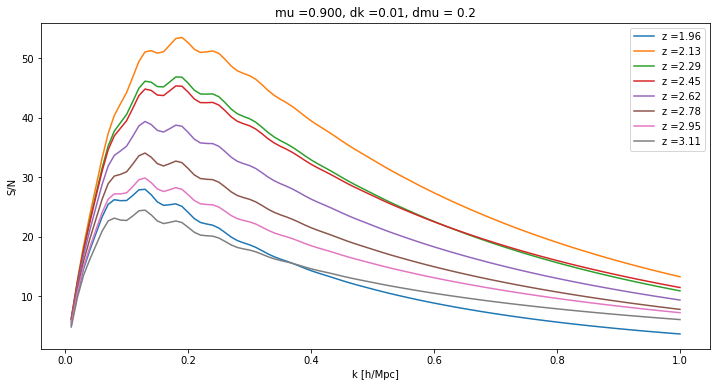

In [9]:
forecast.verbose=1
lmin=3501.0
lmax=3701.0
plt.figure(figsize=(12,6))
while lmin < 5000:
    print(lmin,'<l<',lmax)    
    forecast.lmin=lmin
    forecast.lmax=lmax
    z = forecast.mean_z()
    mu = 0.9
    dmu = 0.2
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])      
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='z ='+z_str(z))
    lmin = lmax 
    lmax += 200
plt.legend(loc='best')
plt.title('mu ='+mu_str(mu)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_mu'+mu_str(mu)+'.pdf')

### Plot fixed z, for different mu


mus [0.1 0.3 0.5 0.7 0.9]
lc, lrc, zq = 3798.6839826445157 1087.1982339941508 2.494012282092203
I1, I2, I3 = 0.0002980759419434001 0.0002273074586046626 3.819762054946127e-05
np_eff, Pw2D, PN_eff = 0.3528686868997825 0.04322187825160459 0.36315854196434616


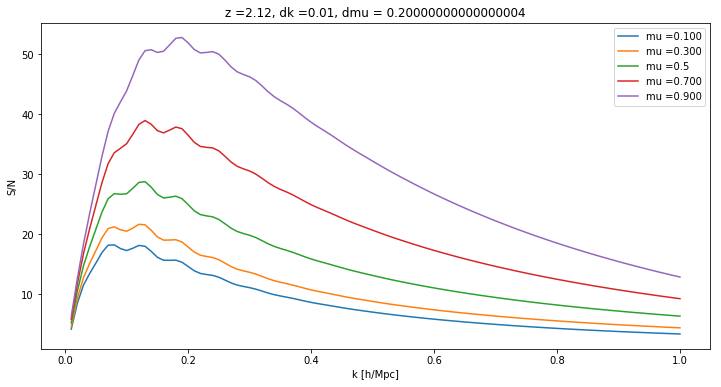

In [10]:
mus=np.linspace(0.1,0.9,5)
dmu=mus[1]-mus[0]
print('mus',mus)
forecast.lmin=3700.0
forecast.lmax=3900.0
z = forecast.mean_z()
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
plt.figure(figsize=(12,6))
for mu in mus:
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])    
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='mu ='+mu_str(mu))
plt.legend(loc='best')
plt.title('z ='+z_str(z)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_z'+z_str(z)+'.pdf')